In [1]:
import numpy as np

In [9]:
from PIL import Image, ImageOps

In [267]:
timestep= 500

In [268]:
u = Image.open(f"u/u_{timestep}.png")

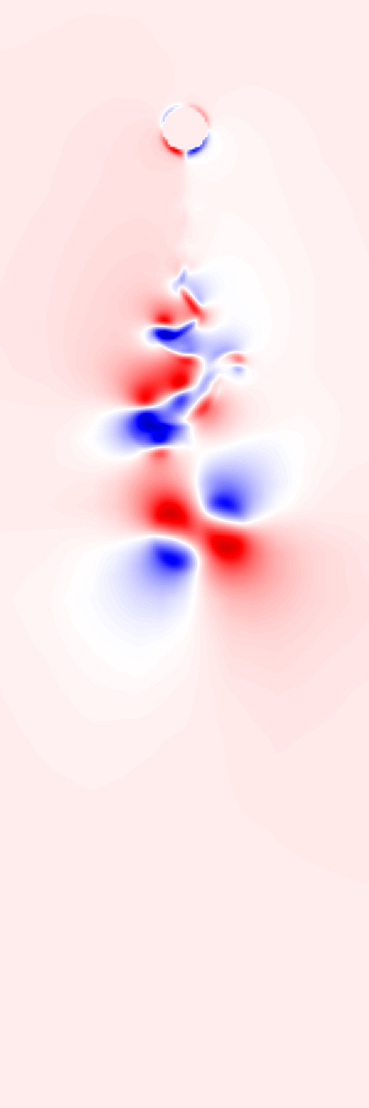

In [269]:
u

In [270]:
u_gray = ImageOps.grayscale(u)

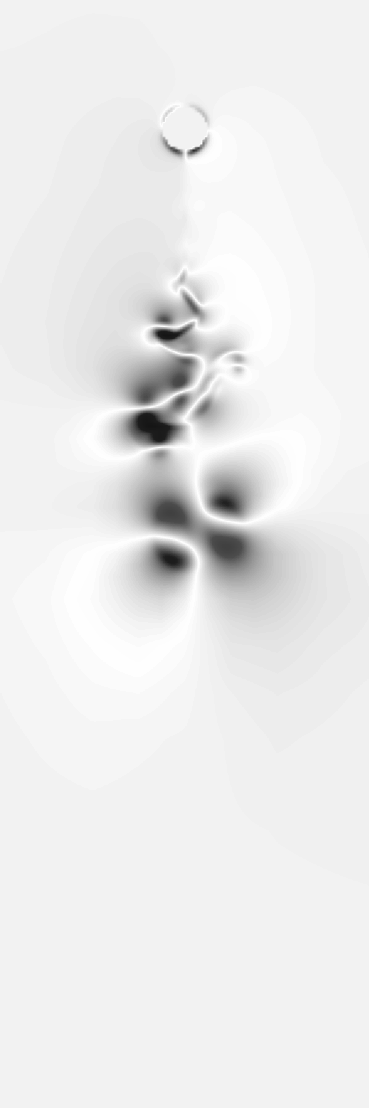

In [271]:
u_gray

In [272]:
u_np_array = np.array(u_gray)

In [273]:
u_np_array = (u_np_array/255)

In [274]:
from sklearn.preprocessing import MinMaxScaler

In [275]:
scaler = MinMaxScaler(feature_range=(-0.6811115741729736, 0.6312969923019409))

In [276]:
scaled_u = scaler.fit_transform(u_np_array)

In [277]:
np.max(scaled_u)

0.6312969923019427

In [278]:
np.min(scaled_u)

-0.6811115741729745

In [279]:
grad_u = np.gradient(u_np_array)

In [280]:
import matplotlib.pyplot as plt

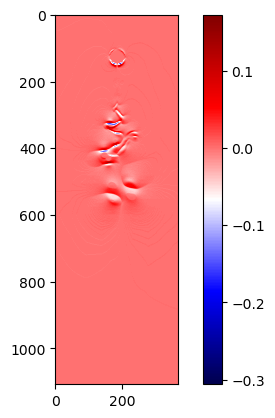

In [281]:
plt.imshow(grad_u[0], cmap='seismic')
plt.colorbar()

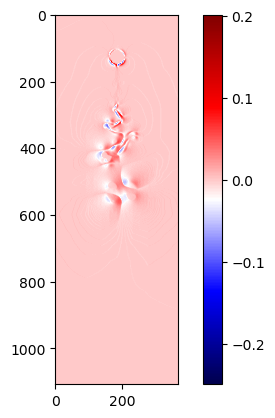

In [282]:
plt.imshow(grad_u[1], cmap='seismic')
plt.colorbar()

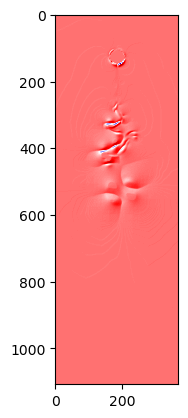

In [283]:
plt.imshow(grad_u[0]+grad_u[1], cmap='seismic')

In [284]:
np.min(grad_u[0]+grad_u[1])

-0.4176470588235295

In [285]:
np.max(grad_u[0]+grad_u[1])

0.23725490196078433

In [286]:
np.mean(grad_u[0]+grad_u[1])

-2.206081379848256e-06

In [287]:
v = Image.open(f"v/v_{timestep}.png")

In [288]:
v_gray = ImageOps.grayscale(v)

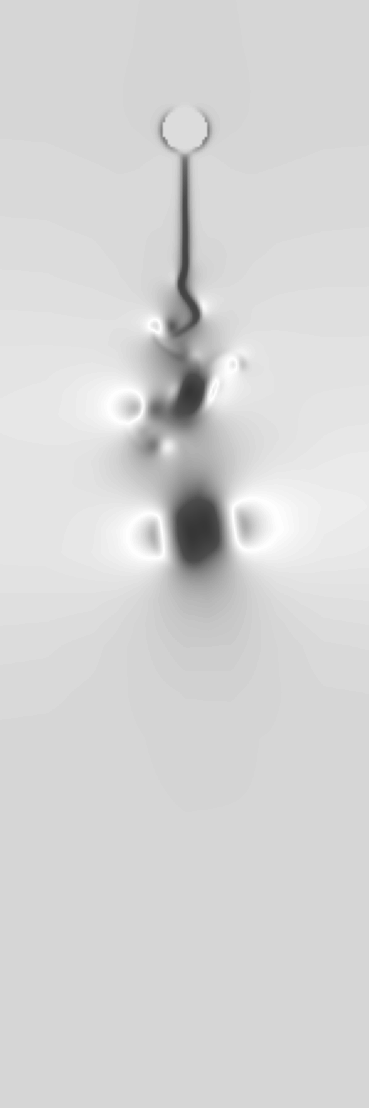

In [289]:
v_gray

In [290]:
v_np_array = np.array(v_gray)

In [291]:
v_np_array = v_np_array/255

In [292]:
v_np_array.shape[0]

1108

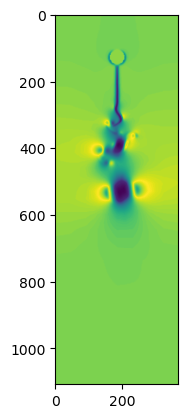

In [293]:
plt.imshow(v_np_array)

In [294]:
grad_v = np.gradient(v_np_array)

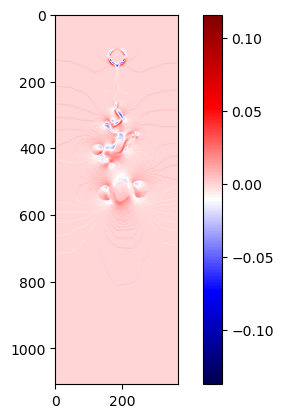

In [295]:
plt.imshow(grad_v[0], cmap='seismic')
plt.colorbar()

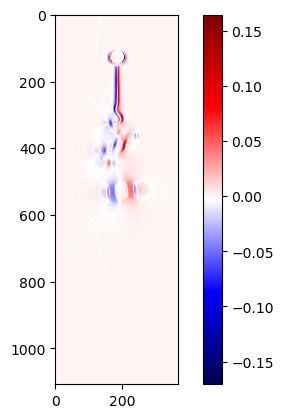

In [296]:
plt.imshow(grad_v[1], cmap='seismic')
plt.colorbar()


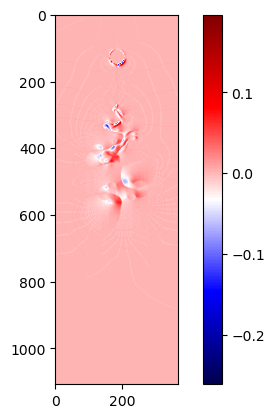

In [297]:
plt.imshow(grad_u[1] + grad_v[0], cmap='seismic')
plt.colorbar()

In [298]:
np.max(grad_u[1] + grad_v[0])

0.19607843137254902

In [299]:
np.min(grad_u[1] + grad_v[0])

-0.2607843137254902

In [300]:
np.mean(grad_u[1] + grad_v[0])

-3.740746687568803e-07

In [301]:
def get_divergence(unscaled_Image_U, unscaled_Image_V):
    u_gray = ImageOps.grayscale(unscaled_Image_U)
    v_gray = ImageOps.grayscale(unscaled_Image_V)
    scaled_u = u_gray/255
    scaled_v = v_gray/255
    grad_u = np.gradient(scaled_u)
    grad_v = np.gradient(scaled_v)
    return grad_u[1]+grad_v[0]